In [1]:
#Data Analysis

In [1]:
pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4e4285ab9ef19c67f1c93a37c1fe9c00380da1e38d91422d8855e26a20408602
  Stored in directory: c:\users\ajith\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [2]:
## for data processing using panda and numpy dataframes
import pandas as pd
import numpy as np
## for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical testing
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for Developing machine learning models
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
from sklearn.preprocessing import StandardScaler

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [4]:
house_df = pd.read_csv("DA_Grp_8_Dataset.csv")

In [5]:
house_df.head(10)

,index,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Acre,Property_Type,Year_Built,Status
0,0,1618 grant st,Berkeley,Alameda-County,Ca,94703,995000.0,92.0,96.0,2.0,1.0,849.0,0.0,Single Family Residentialingle family residential,1913.0,"<span class=""DefinitionFlyoutLink inline-block..."
1,1,6747 tory way,Dublin,Alameda-County,Ca,94568,1299000.0,44.0,77.0,4.0,2.0,1638.0,0.0,Single Family Residentialingle family residential,1966.0,"<span class=""DefinitionFlyoutLink inline-block..."
2,5,4455 carson st,Oakland,Alameda-County,Ca,94619,1500000.0,55.0,29.0,4.0,3.0,1927.0,0.0,Single Family Residentialingle family residential,1925.0,"<span class=""DefinitionFlyoutLink inline-block..."
3,6,420 mcauley st,Oakland,Alameda-County,Ca,94609,995000.0,91.0,99.0,3.0,1.5,1085.0,0.0,Single Family Residentialingle family residential,1935.0,"<span class=""DefinitionFlyoutLink inline-block..."
4,12,240 hillcrest,Livermore,Alameda-County,Ca,94550,1268888.0,49.0,49.0,4.0,2.0,1778.0,0.0,Single Family Residentialingle family residential,1960.0,"<span class=""DefinitionFlyoutLink inline-block..."
5,16,780 orangewood dr,Fremont,Alameda-County,Ca,94536,900000.0,15.0,33.0,3.0,2.0,1120.0,0.0,Single Family Residentialingle family residential,1955.0,"<span class=""DefinitionFlyoutLink inline-block..."
6,18,414 amaral cir,Pleasanton,Alameda-County,Ca,94566,1675000.0,84.0,39.0,4.0,2.0,1842.0,0.0,Single Family Residentialingle family residential,1952.0,"<span class=""DefinitionFlyoutLink inline-block..."
7,19,2274 eric ct #4,Union city,Alameda-County,Ca,94587,599998.0,48.0,46.0,2.0,1.0,945.0,0.0,Condoondo,1976.0,"<span class=""DefinitionFlyoutLink inline-block..."
8,20,1648 92nd ave,Oakland,Alameda-County,Ca,94603,780000.0,76.0,56.0,4.0,3.0,2080.0,0.0,Single Family Residentialingle family residential,1938.0,"<span class=""DefinitionFlyoutLink inline-block..."
9,31,3069 bateman st,Berkeley,Alameda-County,Ca,94705,1625000.0,91.0,98.0,4.0,1.5,1726.0,0.0,Single Family Residentialingle family residential,1912.0,"<span class=""DefinitionFlyoutLink inline-block..."


In [6]:
len(house_df.columns)

16

#Propose several research questions. Use visualization and statistical analysis to identify those research questions.
#Some example research questions:
#1) Build regression models to predict the prices of properties and compare your prediction with Zillow's Zestimates and see which one is better or closer to real values.
#2) Which city in Bay Area has the highest appreciation ratio?
#3) Which city in East Bay has the highest potential to be another real estate hot spots?
#4) Is there any bubble in the real estate in Bay Area?
#5) What is the housing price comparing with other big cities in US or Asia?

# Data Analysis

We first do some exploratory data analysis to summarize the main characteristics of this dataset. This can help us to understand what the data can tell us beyond the formal modeling or hypothesis testing task.

In [7]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def test_type(house_df, col, max_cat=20):
    if (house_df[col].dtype == "O") | (house_df[col].nunique() < max_cat):  # "O" means (python) objects
        return "cat"
    else:
        return "num"

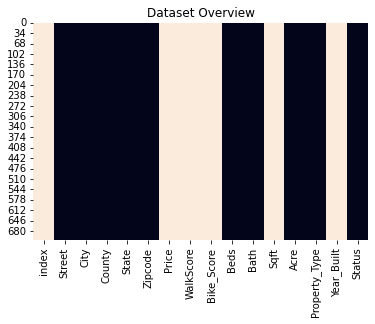

 Categerocial   Numeric   NaN 


In [8]:
columns = {col:test_type(house_df, col, max_cat=20) for col in house_df.columns}
heatmap = house_df.isnull()
for k,v in columns.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.6 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[6;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")
# Based on the python ANSI codes, define the background color and tex color.

In [9]:
house_df.dtypes

index              int64
Street            object
City              object
County            object
State             object
Zipcode           object
Price            float64
WalkScore        float64
Bike_Score       float64
Beds             float64
Bath             float64
Sqft             float64
Acre             float64
Property_Type     object
Year_Built       float64
Status            object
dtype: object

In [10]:
house_df = house_df.set_index("index")

In [11]:
house_df.head()

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Acre,Property_Type,Year_Built,Status
index,,,,,,,,,,,,,,,
0,1618 grant st,Berkeley,Alameda-County,Ca,94703,995000.0,92.0,96.0,2.0,1.0,849.0,0.0,Single Family Residentialingle family residential,1913.0,"<span class=""DefinitionFlyoutLink inline-block..."
1,6747 tory way,Dublin,Alameda-County,Ca,94568,1299000.0,44.0,77.0,4.0,2.0,1638.0,0.0,Single Family Residentialingle family residential,1966.0,"<span class=""DefinitionFlyoutLink inline-block..."
5,4455 carson st,Oakland,Alameda-County,Ca,94619,1500000.0,55.0,29.0,4.0,3.0,1927.0,0.0,Single Family Residentialingle family residential,1925.0,"<span class=""DefinitionFlyoutLink inline-block..."
6,420 mcauley st,Oakland,Alameda-County,Ca,94609,995000.0,91.0,99.0,3.0,1.5,1085.0,0.0,Single Family Residentialingle family residential,1935.0,"<span class=""DefinitionFlyoutLink inline-block..."
12,240 hillcrest,Livermore,Alameda-County,Ca,94550,1268888.0,49.0,49.0,4.0,2.0,1778.0,0.0,Single Family Residentialingle family residential,1960.0,"<span class=""DefinitionFlyoutLink inline-block..."


In [12]:
#Price
house_df['Price'].describe()

count    7.100000e+02
mean     1.167206e+06
std      7.020154e+05
min      5.995000e+04
25%      6.490000e+05
50%      9.980000e+05
75%      1.500000e+06
max      3.700000e+06
Name: Price, dtype: float64

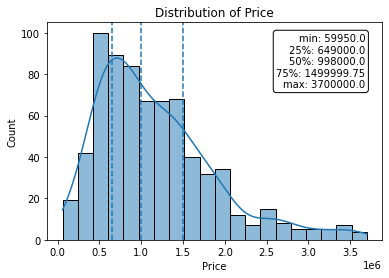

In [13]:
x = "Price"
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Price')
variable = house_df[x].fillna(house_df[x].mean())
sns.histplot(variable, kde=True)
des = house_df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
plt.show()

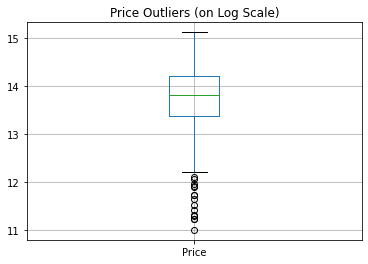

In [14]:
#A box plot to graphically depict data groups through their quartiles.

x = "Price"
fig, ax = plt.subplots()
ax.title.set_text('Price Outliers (on Log Scale)')
tmp_house_df = pd.DataFrame(house_df[x])
tmp_house_df[x] = np.log(tmp_house_df[x])
tmp_house_df.boxplot(column=x, ax=ax)
plt.show()

In [ ]:
house_df = df.groupby(by="City")
house_price_df = pd.DataFrame(city_df['PricePerSqft'].mean().round(2))
house_price_df

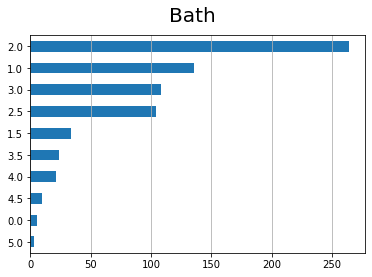

In [15]:
#A bar plot is appropriate to understand labels frequency for a single categorical variable.

x = "Bath"
ax = house_df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

ValueError: 'City' is not a valid value for axis; supported values are 'x', 'y', 'both'

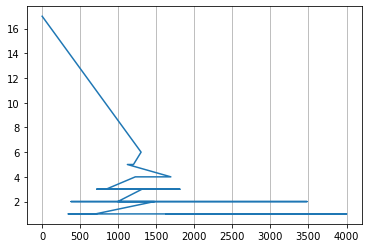

In [19]:
x = "Sqft"
y = "City"
ax = house_df[x].value_counts().sort_values().plot()
ax.grid(axis="x")
ax.grid(axis=y)
plt.suptitle(x,y, fontsize=20)
plt.show()

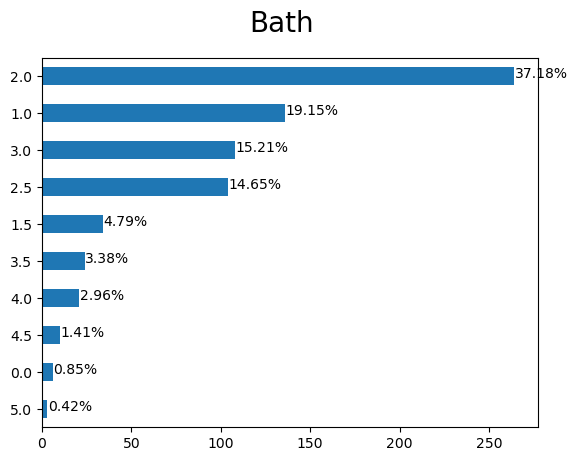

In [21]:
x = "Bath"
ax = house_df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
#ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

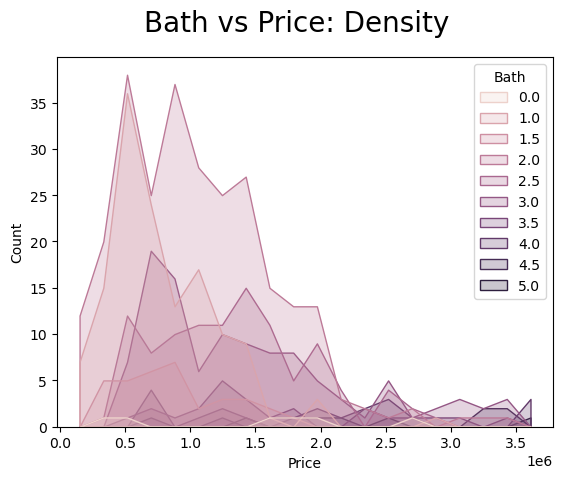

In [22]:
#We first check the categorical vs numerical case by comparing Bath and Price.
#method 1

fig, ax = plt.subplots()
fig.suptitle("Bath vs Price: Density", fontsize=20)
sns.histplot(data = house_df, x = "Price", hue = "Bath", element="poly")  

In [23]:
#method 2

cat, num = "Bath", "Price"
breaks = np.quantile(house_df[num], q=np.linspace(0,1,11))
tmp = house_df.groupby([cat, pd.cut(house_df[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[house_df[cat].unique()]
tmp

Bath,1.0,2.0,3.0,1.5,4.5,2.5,4.0,3.5,0.0,5.0
Price,,,,,,,,,,
"(59950.0, 439945.0]",24,39,0,5,0,1,0,0,1,0
"(439945.0, 589800.0]",27,26,5,4,0,7,0,1,1,0
"(589800.0, 699000.0]",22,21,11,3,1,11,3,0,0,0
"(699000.0, 850000.0]",15,24,17,9,0,4,1,2,0,0
"(850000.0, 998000.0]",15,28,11,4,0,13,0,2,0,0
"(998000.0, 1200000.0]",13,30,11,2,1,7,2,3,0,0
"(1200000.0, 1398888.0]",10,26,8,2,0,18,1,5,0,0
"(1398888.0, 1681600.0]",5,30,9,3,1,18,1,2,0,1
"(1681600.0, 1998100.0]",3,27,16,2,2,13,3,2,3,0


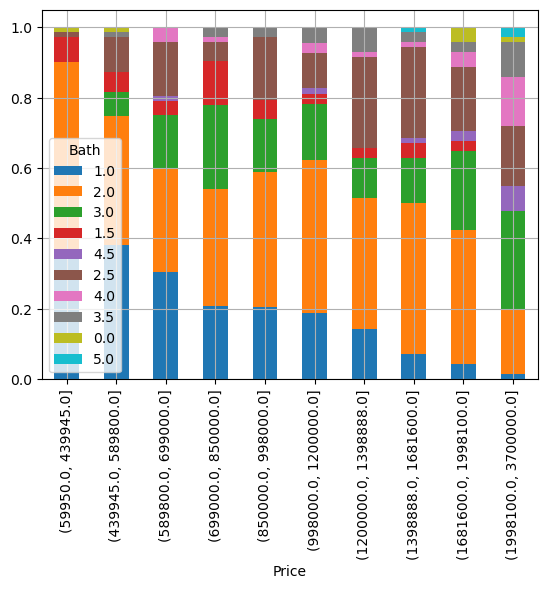

In [24]:
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
    tmp[col] = tmp[col] / tmp["tot"] 
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, legend=True , grid=True)

# Put a legend to the right of the current axis
#ax.legend(loc='center right', bbox_to_anchor=(2, 1.5))
plt.show()

Bath is predictive given that the distributions of the 4 samples are very different in price levels and number of observations. It appears that the more bathrooms there are in the house the higher is the price.

However, the “eye intuition” may not be convincing enough. So we can use a one-way ANOVA test to check the statistical significance. Basically, it tests whether the means of two or more independent samples are significantly different, so if the p-value is small enough (<0.05) the null hypothesis of samples means equality can be rejected.

In [25]:
cat, num = "Bath", "Price"
model = smf.ols(num+' ~ '+cat, data=house_df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


We can conclude that the number of bathrooms determines a higher price of the house. That makes sense as more bathrooms mean a bigger house and the size of the house is an important price factor

Next, we check the numerical vs numerical case. Here we use the sqft vs Price as an example to do the analysis. We have three ways to do the work.

First, we can group Sqft values into bins and compare the mean value (and median) of Price in each bin, if the curve isn’t flat then the variable is predictive because the bins have different patterns.

Second, we can use a scatter plot with the distributions of the two variables on the sides.

Third, since they are both numerical variables, we can test the Pearson’s Correlation Coefficient: 
assuming that two variables are independent (null hypothesis), 
it tests whether two samples have a linear relationship. 

If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent.

                          mean     median  size
Sqft                                           
(0.0, 835.7]      5.483311e+05   527500.0    54
(835.7, 1062.6]   7.857505e+05   749000.0    71
(1062.6, 1210.5]  8.760041e+05   825000.0    71
(1210.5, 1331.0]  9.989123e+05   991500.0    72
(1331.0, 1489.0]  1.042849e+06  1009500.0    70
(1489.0, 1685.2]  1.037541e+06  1095000.0    71
(1685.2, 1884.8]  1.263198e+06  1280000.0    71
(1884.8, 2219.2]  1.493973e+06  1498000.0    71
(2219.2, 2717.3]  1.549113e+06  1395000.0    71
(2717.3, 4000.0]  1.914380e+06  1750000.0    71


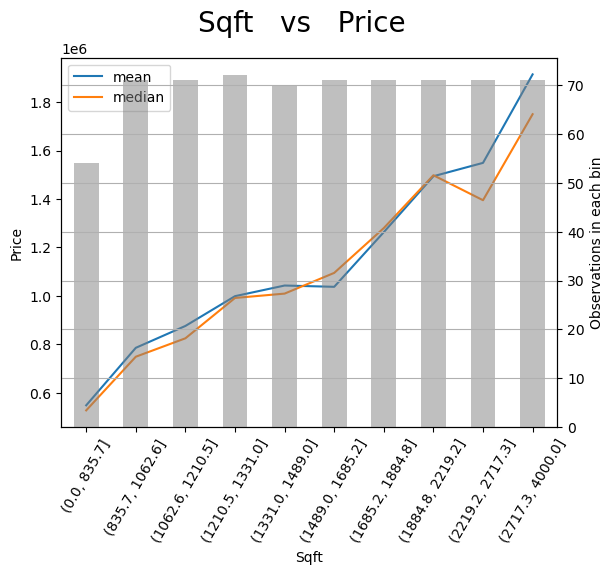

In [26]:
#1st method

x, y = "Sqft", "Price"
### bin plot
house_df_noNan = house_df[house_df[x].notnull()]
breaks = np.quantile(house_df_noNan[x], q=np.linspace(0, 1, 11))
groups = house_df_noNan.groupby([pd.cut(house_df_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
print(groups)
fig, ax = plt.subplots()
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=60, secondary_y=True,
                    color="grey", alpha=0.5, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observations in each bin")
plt.show()

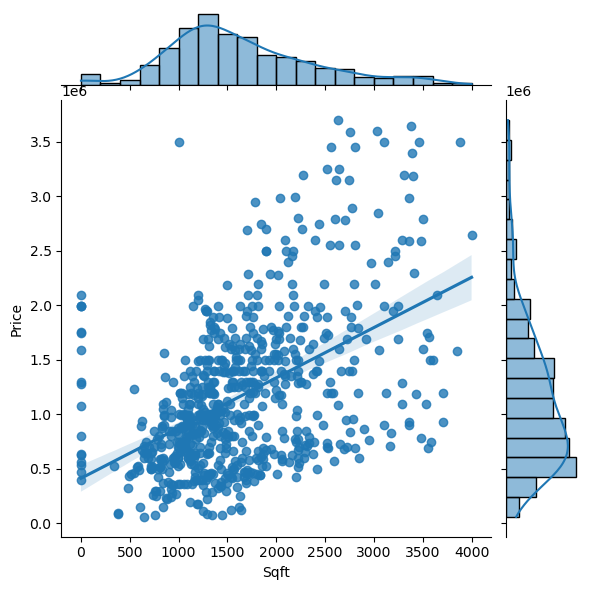

In [27]:
#2nd method
### scatter plot
sns.jointplot(x=x, y=y, data=house_df, dropna=True, kind='reg')
plt.show()

In [28]:
#3rd method

x, y = "Sqft", "Price"
house_df_noNan = house_df[house_df[x].notnull()]
coeff, p = scipy.stats.pearsonr(house_df_noNan[x], house_df_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.493 Significant (p-value: 0.0)


It is clear that Sqft is predictive, there is a clear pattern: on average, the larger the house the higher the price, even though there are some outliers with an above-average size and a relatively low price.

Bath and Sqft are examples of predictive features. 
#####This kind of analysis should be carried on for each variable in the dataset to decide what should be kept as a potential feature and what can be dropped because not predictive#####

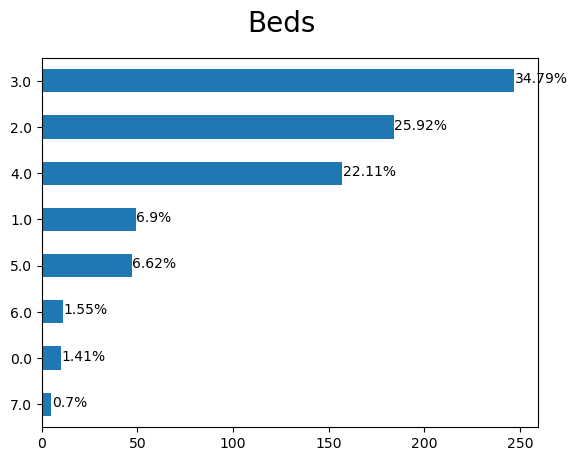

In [29]:
#Beds

x = "Beds"
ax = house_df[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
#ax.grid(axis="x")
plt.suptitle(x, fontsize=20,)
plt.show()

Text(0, 0.5, 'Count')

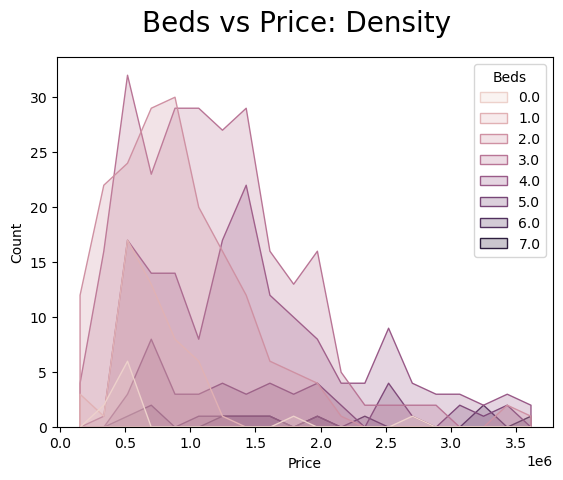

In [30]:
#  good plot
fig, ax = plt.subplots()
fig.suptitle("Beds vs Price: Density", fontsize=20)
sns.histplot(data = house_df, x = "Price", hue = "Beds", element="poly", legend=True,) 
ax.set_ylabel('Count')

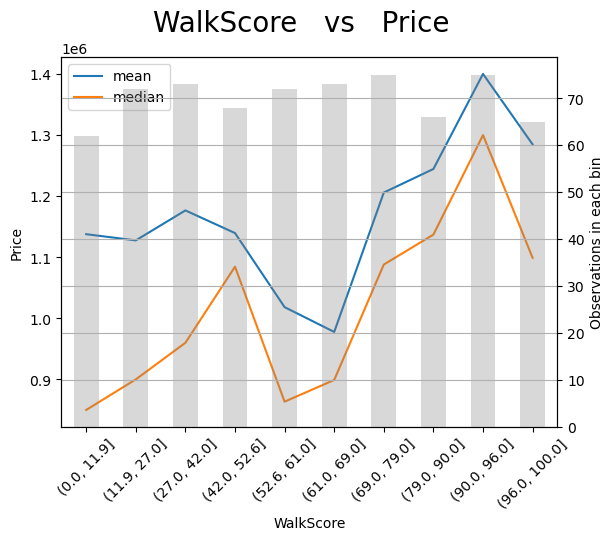

In [33]:
x, y = "WalkScore", "Price"
### bin plot
house_df_noNan = house_df[house_df[x].notnull()]
breaks = np.quantile(house_df_noNan[x], q=np.linspace(0, 1, 11))
groups = house_df_noNan.groupby([pd.cut(house_df_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
#print(groups)
fig, ax = plt.subplots()
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observations in each bin")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

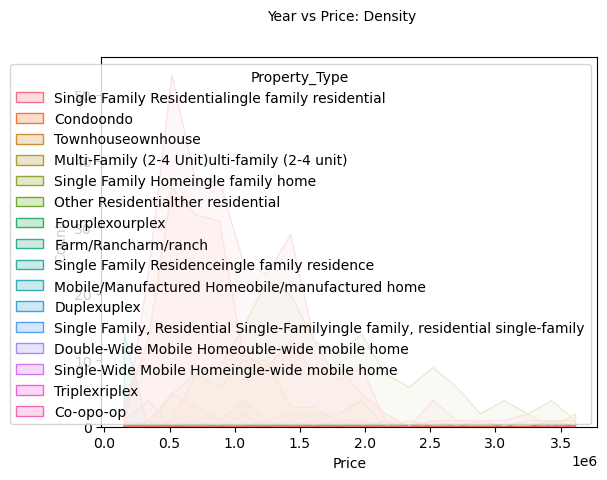

In [35]:
fig, ax = plt.subplots()
fig.suptitle("Year vs Price: Density", fontsize=10)
sns.histplot(data = house_df, x = "Price", hue = "Property_Type", element="poly",legend=True)  


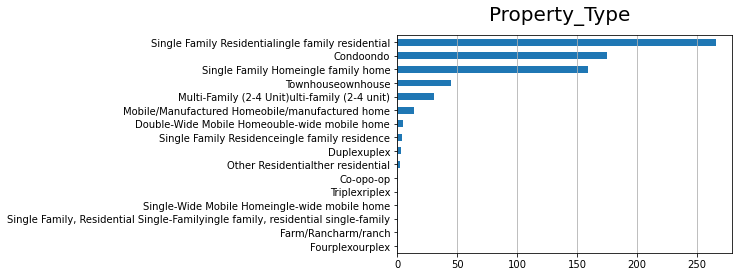

In [20]:
x = "Property_Type"
ax = house_df[x].value_counts().sort_values().plot(kind="barh")
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

# REGRESSION

**Prof.Balaraman Code (Till *Plotting the Residuals*)**

In [36]:
house_df.columns

Index(['Street', 'City', 'County', 'State', 'Zipcode', 'Price', 'WalkScore',
       'Bike_Score', 'Beds', 'Bath', 'Sqft', 'Acre', 'Property_Type',
       'Year_Built', 'Status'],
      dtype='object')

In [38]:
predictors = ['City', 'WalkScore',
       'Bike_Score', 'Beds', 'Bath', 'Sqft', 'Property_Type',]
outcome = 'Price'

# partition data
X = pd.get_dummies(house_df[predictors], drop_first=True)
y = house_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

house_lm = LinearRegression()
house_lm.fit(train_X, train_y)

# print coefficients
print('intercept is: ', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))

# print performance measures
regressionSummary(train_y, house_lm.predict(train_X))

intercept is:  125149.87135319994
                                            Predictor   coefficient
0                                           WalkScore  9.511647e+02
1                                          Bike_Score  9.158697e+02
2                                                Beds  6.920322e+04
3                                                Bath  1.048853e+05
4                                                Sqft  3.268882e+02
..                                                ...           ...
77  Property_Type_Single Family Residentialingle f...  8.667062e+04
78  Property_Type_Single Family, Residential Singl... -1.164153e-10
79  Property_Type_Single-Wide Mobile Homeingle-wid... -3.136707e+05
80                    Property_Type_Townhouseownhouse -1.123505e+05
81                        Property_Type_Triplexriplex  0.000000e+00

[82 rows x 2 columns]

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 320237.0212
    

In [39]:
pred_y = house_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, house_lm))
print('AIC : ', AIC_score(train_y, pred_y, house_lm))
print('BIC : ', BIC_score(train_y, pred_y, house_lm))

adjusted r2 :  0.7418033708007068
AIC :  12177.583451724338
BIC :  12518.156356810965


# Measuring the performance on Validation Set

In [40]:
# Use predict() to make predictions on a new set
house_lm_pred = house_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': house_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - house_lm_pred})
print(result.Residual.abs().mean())
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, house_lm_pred)

277522.61745067465
          Predicted     Actual      Residual
index                                       
358    1.326793e+06  1895000.0  5.682075e+05
1009   6.995981e+05   850000.0  1.504019e+05
1409   8.489951e+05   525000.0 -3.239951e+05
184    7.302761e+05   928000.0  1.977239e+05
784    3.929092e+05   450000.0  5.709082e+04
1402   1.395601e+06  1399888.0  4.287315e+03
1705   1.759742e+06  3250000.0  1.490258e+06
154    9.495715e+05   950000.0  4.284795e+02
1213   4.999608e+05   520000.0  2.003920e+04
141    1.054468e+06   899000.0 -1.554680e+05
1002   2.341416e+06  1585000.0 -7.564160e+05
877    3.247398e+05   343950.0  1.921019e+04
1473   8.651484e+05   699000.0 -1.661484e+05
1718   1.409520e+06  1750000.0  3.404801e+05
991    9.622968e+05   949113.0 -1.318380e+04
20     1.332791e+06   780000.0 -5.527908e+05
504    1.174869e+06  1500000.0  3.251310e+05
742    4.146844e+05   419500.0  4.815573e+03
129    9.524129e+05   799000.0 -1.534129e+05
268    1.189218e+06  1799000.0  6.09

# Plotting the residuals
Determine the residuals and create a histogram
The residual for each observation is the difference between predicted values of y (dependent variable) and observed values of y.
Residual=actual y value−predicted y value,ri=yi−^yi.

0.01056338028169014


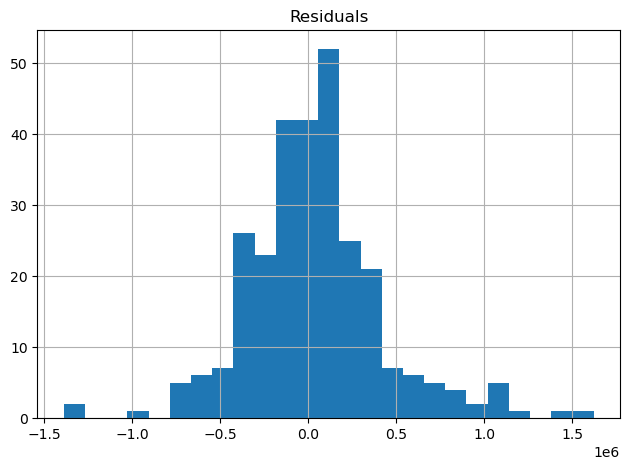

In [41]:
house_lm_pred = house_lm.predict(valid_X)
all_residuals = valid_y - house_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

 **End of Prof.Balaraman's Code**

In [45]:
house2_df=house_df.drop([ 'Street','City', 'County', 'State', 'Zipcode','Year_Built','Property_Type','Status','Acre'],axis=1)
print(house2_df)

           Price  WalkScore  Bike_Score  Beds  Bath    Sqft
index                                                      
0       995000.0       92.0        96.0   2.0   1.0   849.0
1      1299000.0       44.0        77.0   4.0   2.0  1638.0
5      1500000.0       55.0        29.0   4.0   3.0  1927.0
6       995000.0       91.0        99.0   3.0   1.5  1085.0
12     1268888.0       49.0        49.0   4.0   2.0  1778.0
...          ...        ...         ...   ...   ...     ...
1734   1280000.0       54.0        65.0   4.0   3.5  2093.0
1741   3450000.0       80.0        79.0   4.0   3.0  2810.0
1742    819000.0       95.0        93.0   2.0   2.5  1488.0
1746    699000.0       59.0        86.0   2.0   2.0   992.0
1748    489000.0       78.0        80.0   1.0   1.0   599.0

[710 rows x 6 columns]


# Processing
Data preprocessing is the phase of preparing raw data to make it suitable for a machine learning model.

In particular:
each observation must be represented by a single row, in other words, you can’t have two rows describing the same passenger because they will be processed separately by the model (the dataset is already in such form, so check!).

Moreover, each column should be a feature, so you shouldn’t use Id as a predictor, that’s why this kind of table is called “feature matrix”.

The dataset must be partitioned into at least two sets: the model shall be trained on a significant portion of your dataset (so-called “train set”) and tested on a smaller set (“test set”).

Missing values should be replaced with something, otherwise, your model may freak out.
Categorical data must be encoded, which means converting labels into integers because machine learning expects numbers, not strings.
It’s good practice to scale the data, it helps to normalize the data within a particular range and speed up the calculations in an algorithm.

Let’s begin by partitioning the dataset. When splitting data into train and test sets you must follow 1 basic rule: rows in the train set shouldn’t appear in the test set as well.

In [47]:
y='Price'

## split data
house_train, house_test = model_selection.train_test_split(house2_df, test_size=0.4,random_state=1)

## print info
print("X_train shape:", house_train.shape, "| X_test shape:", house_test.shape)
#print("y_train mean:", round(np.mean(house_train["Price"])), "| y_test mean:", round(np.mean(house_test["Price"])))
print("y_train mean:", round(np.mean(house_train['Price']),2), "| y_test mean:", round(np.mean(house_test['Price']),2))


#features=[ 'Walk_Score', 'Bike_Score', 'Beds', 'Bath', 'Sqft',]
#housing_df[features]



X_train shape: (426, 6) | X_test shape: (284, 6)
y_train mean: 1155823.25 | y_test mean: 1184279.21


In [48]:
house_train

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft
index,,,,,,
479,1025000.0,94.0,74.0,1.0,2.0,1266.0
1659,599888.0,71.0,66.0,2.0,1.5,1099.0
178,1395000.0,88.0,87.0,3.0,1.0,1569.0
1263,1398000.0,59.0,56.0,4.0,2.0,1680.0
104,999888.0,64.0,82.0,3.0,2.0,1600.0
...,...,...,...,...,...,...
349,648892.0,82.0,57.0,3.0,2.0,1224.0
1583,289000.0,66.0,57.0,3.0,2.0,1344.0
167,699000.0,87.0,72.0,2.0,1.0,1064.0


 Last but not least, we are going to **scale the features**. For regression problems, it is often desirable to transform both the input and the target variables. We use the RobustScaler which transforms the feature by subtracting the median and then dividing by the interquartile range (75% value — 25% value). The advantage of this scaler is that it’s less affected by outliers.

In [49]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(house_test)
house_test_scaled= pd.DataFrame(X, columns=house_test.columns, index=house_test.index)

## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
house_test_scaled[y] = scalerY.fit_transform(house_test[y].values.reshape(-1,1))
house_test_scaled.head()

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft
index,,,,,,
358,1.044373,0.86,0.285714,-0.5,0.0,-0.211808
1009,-0.174286,-1.04,-0.857143,0.5,1.0,0.740270
1409,-0.553294,-0.12,0.057143,-1.0,-1.0,-1.083400
184,-0.083324,0.54,-0.057143,-0.5,0.0,-0.529521
784,-0.640758,-0.72,-0.685714,0.0,0.0,0.102727


# Feature Selection

**Feature selection** is the process of selecting a subset of relevant variables to build the machine learning model. It makes the model easier to interpret and reduces overfitting (when the model adapts too much to the training data and performs badly outside the train set).

We already did a first “manual” feature selection during data analysis by excluding irrelevant columns. Now it’s going to be a bit different because we have to deal with the **multicollinearity** problem, which refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related.

For example: *GarageCars* is highly correlated with *GarageArea* because they both give the same information (how big the garage is, one in terms of how many cars can fit, the other in square feet). Let’s compute the correlation matrix to see it:

Text(0.5, 1.0, 'Pearson correlation')

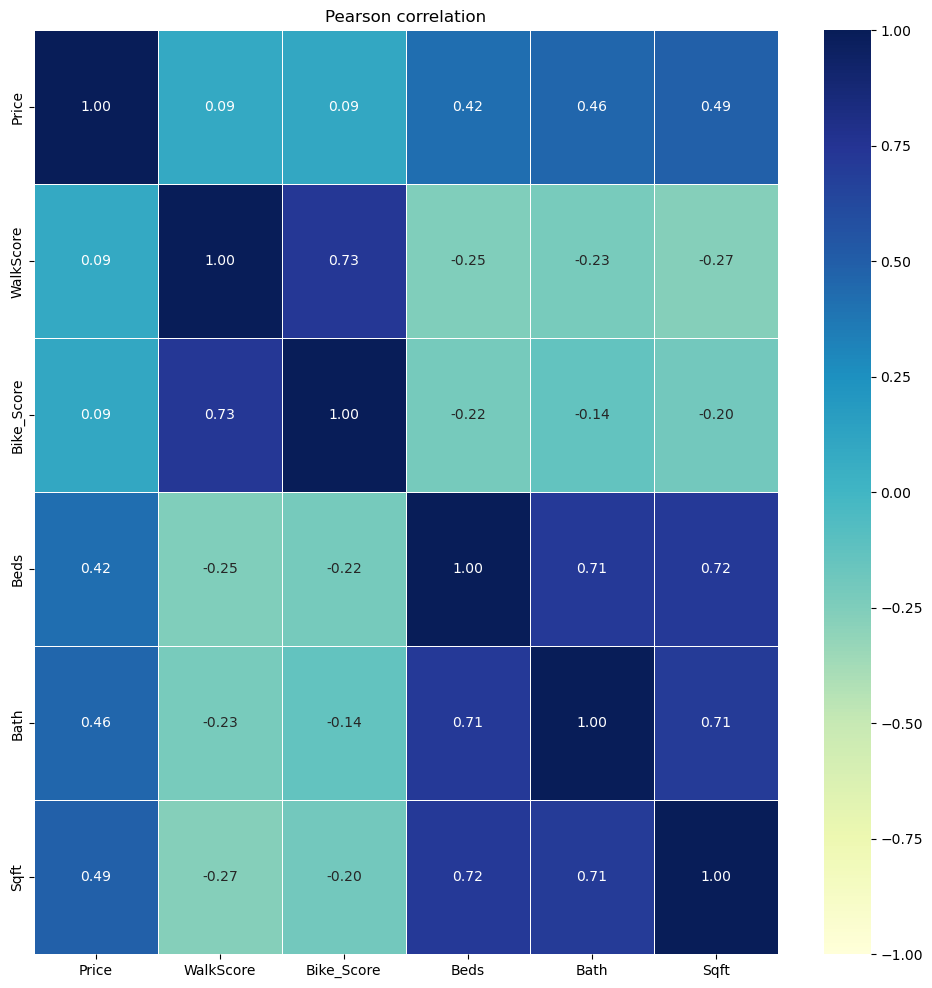

In [50]:
fig, ax = plt.subplots(figsize=(12,12))      
corr_matrix = house_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax = ax)
plt.title("Pearson correlation")


There are two methods to do the work:
- **Linear regression** is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. Univariate linear regression tests are widely used for testing the individual effect of each of many regressors: first, the correlation between each regressor and the target is computed, then an ANOVA F-test is performed.
- **RIDGE regularization** is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters.

We check both methods here:

In [52]:
house_train.columns

Index(['Price', 'WalkScore', 'Bike_Score', 'Beds', 'Bath', 'Sqft'], dtype='object')

<Axes: xlabel='selection', ylabel='features'>

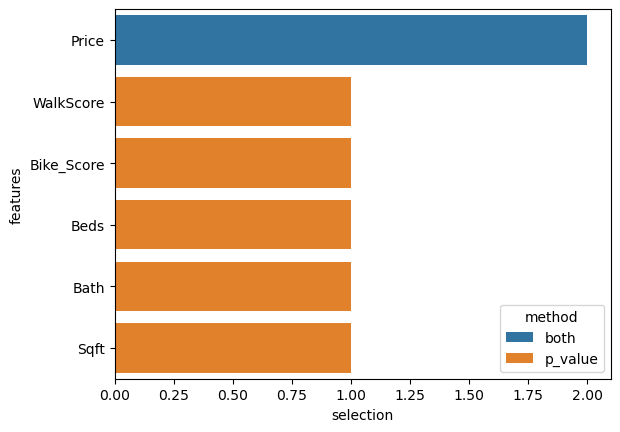

In [53]:
X = house_train.values
y = house_train["Price"].values
feature_names = house_train.columns


## p-value
selector = feature_selection.SelectKBest(score_func= feature_selection.f_regression, k=6).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.Ridge(alpha=1.0, fit_intercept=True),max_features=6).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]


## plot
house_features = pd.DataFrame({"features":feature_names})
house_features["p_value"] = house_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
house_features["num1"] = house_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
house_features["regularization"] = house_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
house_features["num2"] = house_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
house_features["method"] = house_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
house_features["selection"] = house_features["num1"] + house_features["num2"]
house_features["method"] = house_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=house_features.sort_values("selection", ascending=False), dodge=False)

In [54]:
house_train.columns

Index(['Price', 'WalkScore', 'Bike_Score', 'Beds', 'Bath', 'Sqft'], dtype='object')

In [55]:
feature_names

Index(['Price', 'WalkScore', 'Bike_Score', 'Beds', 'Bath', 'Sqft'], dtype='object')

In [56]:
house_test

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft
index,,,,,,
358,1895000.0,98.0,66.0,2.0,2.0,1410.0
1009,850000.0,3.0,26.0,4.0,3.0,2309.0
1409,525000.0,49.0,58.0,1.0,1.0,587.0
184,928000.0,82.0,54.0,2.0,2.0,1110.0
784,450000.0,19.0,32.0,3.0,2.0,1707.0
...,...,...,...,...,...,...
1572,988000.0,67.0,70.0,3.0,3.5,1681.0
626,3250000.0,96.0,88.0,4.0,4.5,2642.0
739,394000.0,70.0,52.0,3.0,2.0,1244.0


Alternatively, we can use **ensemble methods** to get feature importance. Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

We will give an example using a **gradient boosting algorithm**: it builds an additive model in a forward stage-wise fashion and in each stage fits a regression tree on the negative gradient of the given loss function.

   IMPORTANCE    VARIABLE
4    0.481553        Sqft
1    0.250060  Bike_Score
0    0.124368   WalkScore
2    0.088816        Beds
3    0.055203        Bath


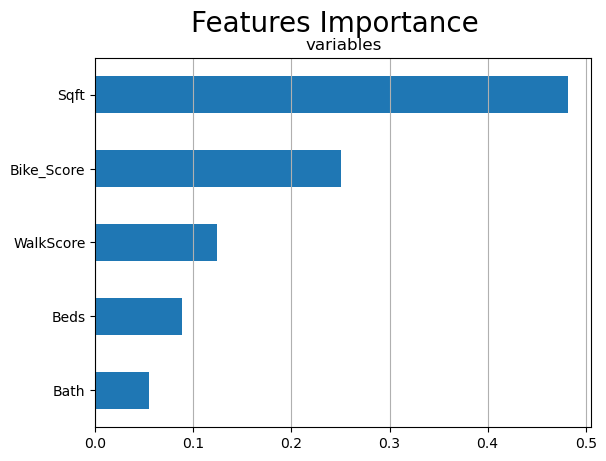

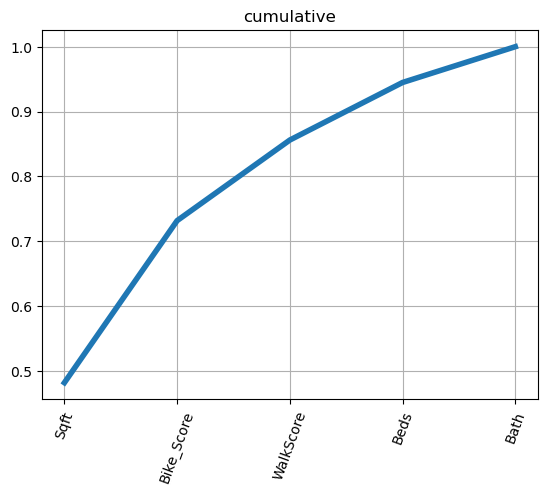

In [57]:
X = house_train.drop("Price", axis=1).values
y = house_train["Price"].values
feature_names = house_train.drop("Price", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
house_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
print(house_importances)
house_importances['cumsum'] = house_importances['IMPORTANCE'].cumsum(axis=0)
house_importances = house_importances.set_index("VARIABLE")

## Plot
#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig, ax = plt.subplots()
fig.suptitle("Features Importance", fontsize=20)
ax.title.set_text('variables')
house_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax).grid(axis="x")
ax.set(ylabel="")
plt.show()
fig, ax = plt.subplots()
ax.title.set_text('cumulative')
house_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax)
ax.set(xlabel="", xticks=np.arange(len(house_importances)), xticklabels=house_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [58]:
house_test

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft
index,,,,,,
358,1895000.0,98.0,66.0,2.0,2.0,1410.0
1009,850000.0,3.0,26.0,4.0,3.0,2309.0
1409,525000.0,49.0,58.0,1.0,1.0,587.0
184,928000.0,82.0,54.0,2.0,2.0,1110.0
784,450000.0,19.0,32.0,3.0,2.0,1707.0
...,...,...,...,...,...,...
1572,988000.0,67.0,70.0,3.0,3.5,1681.0
626,3250000.0,96.0,88.0,4.0,4.5,2642.0
739,394000.0,70.0,52.0,3.0,2.0,1244.0


It’s really interesting that *Sqft*, *Walk_Score* and *Bike_Score* dominate in all the methods presented. So we select these three and proceed with the design, train, test, and evaluation of the machine learning model.

Please note that before using test data for prediction we have to preprocess it just like we did for the train data.

We select the following variables as an example and proceed with the design, train, test, and evaluation of the machine learning model:

In [100]:
X_train = house_train.drop(columns=["Bath","Beds","Price"], axis=1).values
y_train = house_train["Price"].values
X_test=house_test.drop(columns=["Bath","Beds","Price"], axis=1).values
y_test=house_test["Price"].values
sc_X = StandardScaler()
house_train_scaled = sc_X.fit_transform(house_train)
house_test_scaled = sc_X.transform(house_test)

In [96]:
X_names = ['Sqft', 'WalkScore', 'Bike_Score',]
X_train = house_train_scaled[X_names].values
y_train = house_train_scaled["Price"].values
X_test = house_test_scaled[X_names].values
y_test = house_test_scaled["Price"].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [99]:
house_train_scaled

array([[-1.86483876e-01,  1.12781232e+00,  6.24534821e-01,
        -1.62870732e+00, -1.09113994e-01, -4.07171429e-01],
       [-7.92465851e-01,  3.49402550e-01,  2.69088149e-01,
        -7.77383003e-01, -6.82972776e-01, -6.31353315e-01],
       [ 3.40937911e-01,  9.24748904e-01,  1.20213566e+00,
         7.39413139e-02, -1.25683156e+00, -4.22259322e-04],
       ...,
       [-6.51185234e-01,  8.90905001e-01,  5.35673153e-01,
        -7.77383003e-01, -1.25683156e+00, -6.78337543e-01],
       [-7.93731663e-01,  1.29703184e+00,  1.69087484e+00,
        -1.62870732e+00, -1.25683156e+00, -1.18039757e+00],
       [-6.56887091e-01,  1.12781232e+00,  1.24656650e+00,
        -7.77383003e-01, -1.09113994e-01, -7.60224340e-01]])

## Model Design

Finally, it’s time to build the machine learning model. We first run a simple linear regression and use it as a baseline.

The most common metric we normally use is the **R squared**, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

We can compare the linear regression R squared with the gradient boosting’s one using **k-fold cross-validation**, a procedure that consists in splitting the data k times into train and validation sets and for each split, the model is trained and tested. It’s used to check how well the model is able to get trained by some data and predict unseen data.

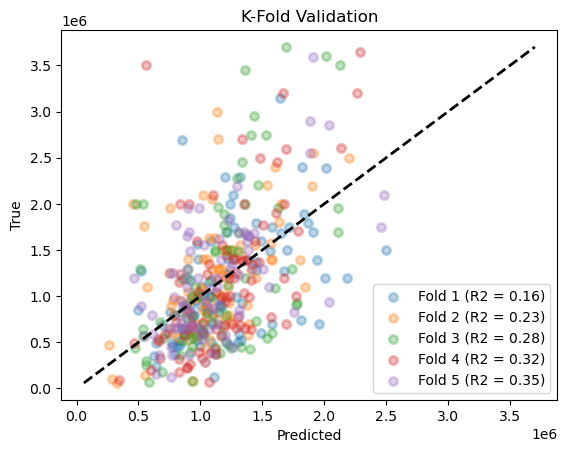

In [101]:
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

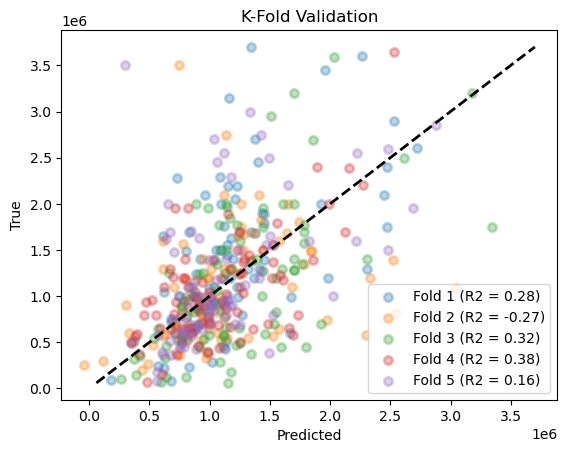

In [102]:
model = ensemble.GradientBoostingRegressor()
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      
             #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  
             #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             
             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         
             #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        
             #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          
             #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]            
             #the fraction of samples to be used for fitting the individual base learners. Values lower than 1
            }
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

The gradient boosting model presents better performances, so we use it to predict test data:

In [103]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

Remember that data were scaled, therefore in order to compare the predictions with the actual house prices in the test set they must be unscaled (with the inverse transform function):

In [104]:
predicted = scalerY.inverse_transform(predicted.reshape(-1,1) ).reshape(-1)
y_test = scalerY.inverse_transform(y_test.reshape(-1,1) ).reshape(-1)

In [105]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.4
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.37
Mean Absolute Error (Σ|y-pred|/n): 360,977,915,635
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 466,995,698,630
Max Error: -1,415,995,187,189


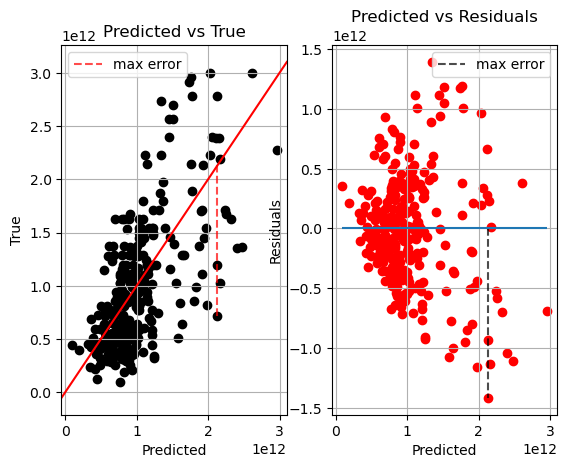

In [106]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

C:\Users\STSC\AppData\Local\Temp\ipykernel_14068\883068963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


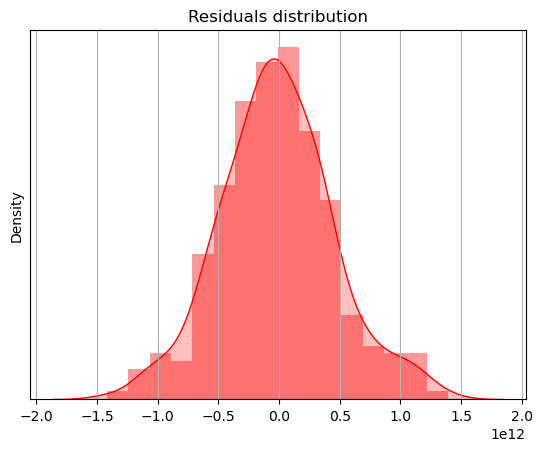

In [107]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

## Explainability

We analyzed and understood the data, we trained a model and tested it, we’re even satisfied with the performance. Now we can go the extra mile and show that our machine learning model is not a black box.

The *Lime* package can help us to build an explainer. To give an illustration we will take a random observation from the test set and see what the model predicts:

In [108]:
print("True:", "{:,.0f}".format(y_test[1]), "---------- Pred:", "{:,.0f}".format(predicted[1]))

True: 728,875,999,450 ---------- Pred: 713,722,095,175


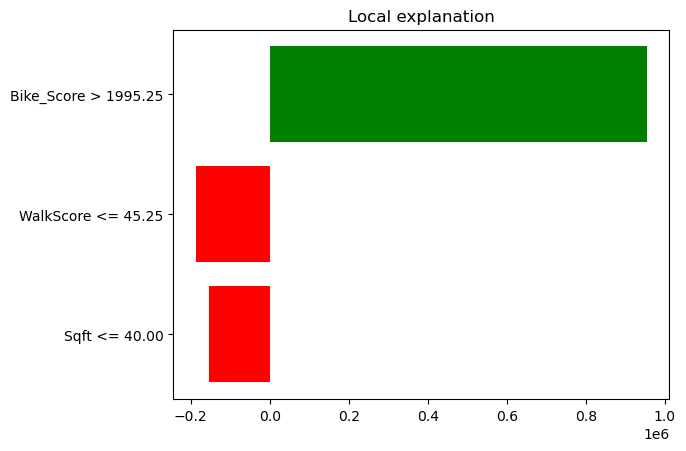

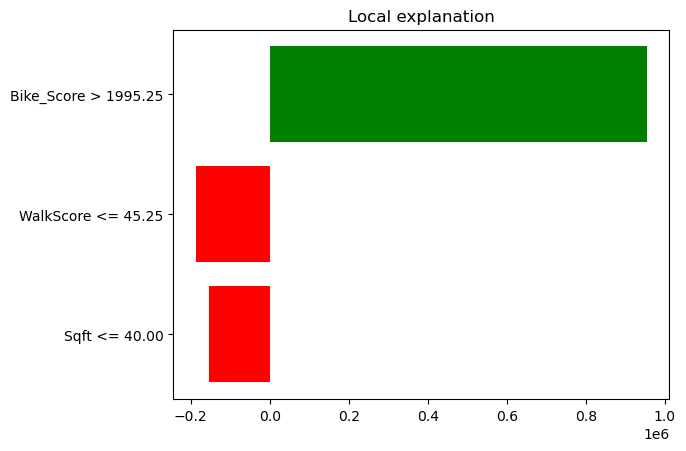

In [109]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Price", mode="regression")
explained = explainer.explain_instance(X_test[1], model.predict, num_features=10)
explained.as_pyplot_figure()